# Actividad 18 de Enero del 2025
En el siguiente documento se hace un análisis de los datos proporcionados por la [INEGI](https://www.inegi.org.mx/programas/ccpv/2020/#tabulados) en los cuales se analiza la población creciente desde los años 1950 hasta el año 2020 en el municipio de **Chimalhuacán**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Década de 1950
### Lectura de datos Quinquenales 

In [111]:
df_q = pd.read_excel("Data_Economia_urbana/POBLACION/cgp50_mex_poblacion_cambiado.xlsx", sheet_name = "CGP50_Mex_Pob2_quinquenales")
df_q.fillna(0)
df_quinquenales = df_q[
    (df_q['Municipio']=='Chimalhuacán') & 
    (df_q['Grupos_quinquenales_de_edad']!='Total') & 
    (df_q['Grupos_quinquenales_de_edad']!='Edad no indicada')
    ]
df_quinquenales

,Entidad federativa,Municipio,Grupos_quinquenales_de_edad,Población_total,Poblacion_Hombres,Poblacion_Mujeres
626,México,Chimalhuacán,De 0 a 4 años,2051.0,990.0,1061.0
627,México,Chimalhuacán,De 5 a 9 años,1918.0,973.0,945.0
628,México,Chimalhuacán,De 10 a 14 años,1489.0,765.0,724.0
629,México,Chimalhuacán,De 15 a 19 años,1171.0,569.0,602.0
630,México,Chimalhuacán,De 20 a 24 años,1045.0,500.0,545.0
631,México,Chimalhuacán,De 25 a 29 años,1059.0,509.0,550.0
632,México,Chimalhuacán,De 30 a 34 años,767.0,393.0,374.0
633,México,Chimalhuacán,De 35 a 39 años,856.0,437.0,419.0
634,México,Chimalhuacán,De 40 a 44 años,619.0,330.0,289.0
635,México,Chimalhuacán,De 45 a 49 años,568.0,293.0,275.0


In [121]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 10 a 14 años')
    ]

df_filtrados_envejecimiento_Arriba = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 95 años y más') 
    ]

IEnvejecimiento_q = float(
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) / 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) *100
            )
IEnvejecimiento_q
print("Indice de Envejecimiento: ", IEnvejecimiento_q)

Indice de Envejecimiento:  9.765481861487725


In [120]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 10 a 14 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 95 años y más') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_Hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  46.223285240336395


### Índices
**Índice de Envejecimiento: 9.765481861487725**  
**Índice de Dependencia: 46.223285240336395**

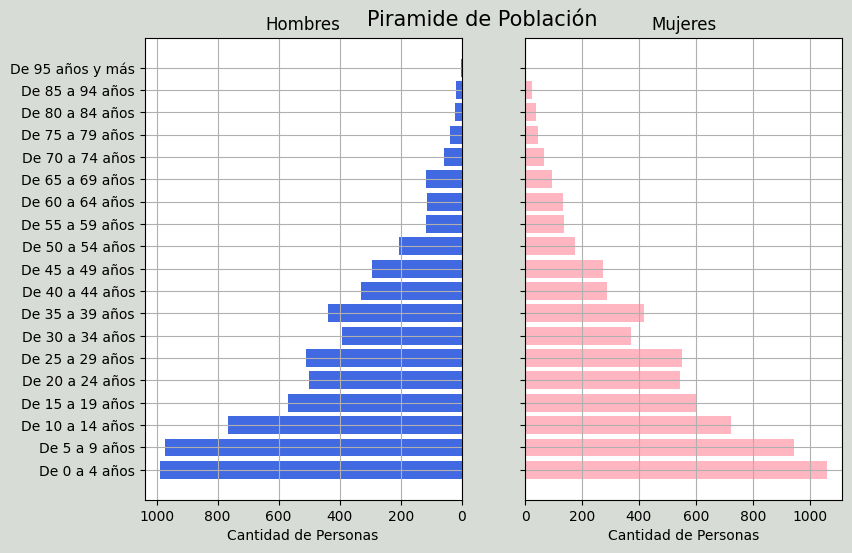

In [79]:
#definir límites para x and y
y = range(0, len(df_quinquenales))
x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[1].set_xlabel("Cantidad de Personas")
#display plot 
plt.show()


### Datos Totales para 1950

In [83]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/cgp50_mex_poblacion_cambiado.xlsx", sheet_name = "CGP50_Mex_Pob3_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
2666,México,Chimalhuacán,Menores de 1 año,426.0,203.0,223.0
2667,México,Chimalhuacán,1 año,334.0,160.0,174.0
2668,México,Chimalhuacán,2 años,394.0,182.0,212.0
2669,México,Chimalhuacán,3 años,441.0,226.0,215.0
2670,México,Chimalhuacán,4 años,456.0,219.0,237.0
...,...,...,...,...,...,...
2748,México,Chimalhuacán,82 años,13.0,6.0,7.0
2749,México,Chimalhuacán,83 años,2.0,0.0,2.0
2750,México,Chimalhuacán,84 años,6.0,1.0,5.0
2751,México,Chimalhuacán,85 a 94 años,45.0,20.0,25.0


### Relación (Hombre y Mujer) y (Mujer y hombre)

In [84]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]


C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_22060\3299950799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_22060\3299950799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
2666,Chimalhuacán,Menores de 1 año,203.0,223.0,91.031390,109.852217
2667,Chimalhuacán,1 año,160.0,174.0,91.954023,108.750000
2668,Chimalhuacán,2 años,182.0,212.0,85.849057,116.483516
2669,Chimalhuacán,3 años,226.0,215.0,105.116279,95.132743
2670,Chimalhuacán,4 años,219.0,237.0,92.405063,108.219178
...,...,...,...,...,...,...
2748,Chimalhuacán,82 años,6.0,7.0,85.714286,116.666667
2749,Chimalhuacán,83 años,0.0,2.0,0.000000,NaN
2750,Chimalhuacán,84 años,1.0,5.0,20.000000,500.000000
2751,Chimalhuacán,85 a 94 años,20.0,25.0,80.000000,125.000000


In [124]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)


8.040017841925863


In [125]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  20.975524639348315


### Índices
**Índice de Dependencia: 8.040017841925863**  
**Índice de Envejecimiento: 20.975524639348315**

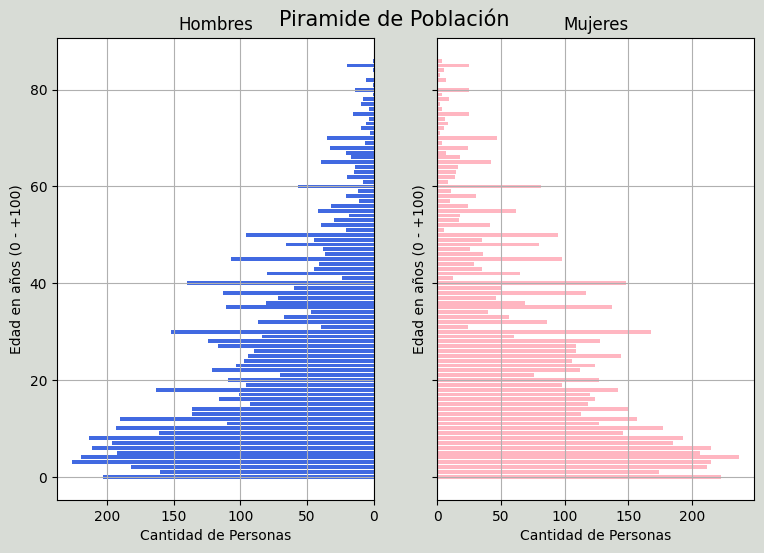

In [81]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()